<a href="https://colab.research.google.com/github/Linameji88/miSitio/blob/main/count_start_corregido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Taller

Desarrolle un programa Python para contar el número total de estrellas en 100 imágenes ubicadas en el directorio "stars/" Utilice Matplotlib para el procesamiento y visualización de imágenes.



1.   Cargue las 100 imágenes del directorio "stars/"



In [14]:
import os

def load_images_from_directory(directory):
    """
    Lista todos los archivos .png en el directorio dado.
    """
    files = os.listdir(directory)
    image_files = [f for f in files if f.lower().endswith('.png')]
    return image_files

# Prueba la función listando las imágenes en "stars"
print(load_images_from_directory("stars"))


['94.png', '87.png', '14.png', '41.png', '88.png', '54.png', '65.png', '97.png', '7.png', '20.png', '36.png', '51.png', '80.png', '70.png', '11.png', '2.png', '60.png', '18.png', '32.png', '78.png', '4.png', '95.png', '38.png', '23.png', '99.png', '47.png', '59.png', '1.png', '61.png', '5.png', '30.png', '89.png', '35.png', '68.png', '93.png', '31.png', '6.png', '15.png', '29.png', '42.png', '82.png', '81.png', '21.png', '73.png', '40.png', '67.png', '39.png', '37.png', '75.png', '52.png', '53.png', '43.png', '100.png', '46.png', '27.png', '8.png', '57.png', '50.png', '10.png', '76.png', '86.png', '34.png', '79.png', '64.png', '72.png', '83.png', '96.png', '77.png', '92.png', '28.png', '22.png', '9.png', '55.png', '13.png', '3.png', '44.png', '69.png', '56.png', '24.png', '66.png', '98.png', '33.png', '49.png', '85.png', '19.png', '71.png', '16.png', '45.png', '25.png', '90.png', '62.png', '91.png', '26.png', '48.png', '12.png', '58.png', '84.png', '17.png', '74.png', '63.png']


In [15]:
import numpy as np

def rgb2gray(image):

    if len(image.shape) == 3:
        return np.dot(image[...,:3], [0.2989, 0.5870, 0.1140])
    else:
        return image





2.   Procesa cada imagen para contar el número de estrellas.

3.   Resuma el recuento total de estrellas en todas las imágenes.

4.   Garantizar la precisión: El error relativo de su recuento de estrellas no debe superar el 5 % (es decir, la precisión del 95 %).

5.   Visualice al menos una imagen procesada con Matplotlib, mostrando cómo se detectan las estrellas.


In [16]:
def threshold_image(gray_image, threshold):
    return (gray_image > threshold).astype(np.uint8)


Función "Flood Fill" para Detectar Componentes Conexos
Utilizaremos un algoritmo de "flood fill" (relleno por difusión) para identificar grupos de píxeles conectados, considerando que cada grupo corresponde a una estrella.
En una nueva celda, copia y ejecuta:

In [17]:
def flood_fill(binary, i, j, visited):
    stack = [(i, j)]
    while stack:
        x, y = stack.pop()
        if visited[x, y]:
            continue
        visited[x, y] = True
        # Revisa los 8 vecinos
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue
                nx, ny = x + dx, y + dy
                if 0 <= nx < binary.shape[0] and 0 <= ny < binary.shape[1]:
                    if binary[nx, ny] == 1 and not visited[nx, ny]:
                        stack.append((nx, ny))


In [18]:
def count_connected_components(binary):

    visited = np.zeros(binary.shape, dtype=bool)
    count = 0
    for i in range(binary.shape[0]):
        for j in range(binary.shape[1]):
            if binary[i, j] == 1 and not visited[i, j]:
                count += 1
                flood_fill(binary, i, j, visited)
    return count


In [19]:
import matplotlib.pyplot as plt

def process_image(image_path, threshold=0.8):

    img = plt.imread(image_path)
    gray = rgb2gray(img)
    # Normalizar si los valores están en [0, 255]
    if gray.max() > 1:
        gray = gray / 255.0
    binary = threshold_image(gray, threshold)
    star_count = count_connected_components(binary)
    return star_count, img, binary

# Para probar esta función, ejecuta:
test_image_path = os.path.join("stars", load_images_from_directory("stars")[0])
count, orig, binary_img = process_image(test_image_path)
print("Estrellas detectadas en la imagen:", count)


Estrellas detectadas en la imagen: 36


Total de estrellas contadas en todas las imágenes: 5265


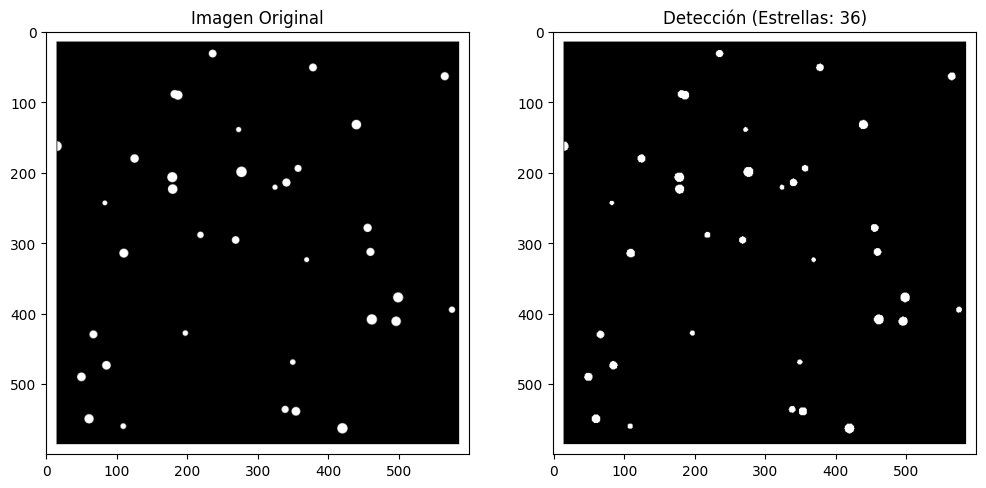

In [20]:
def main():
    directory = "stars"
    image_files = load_images_from_directory(directory)
    total_stars = 0

    for filename in image_files:
        image_path = os.path.join(directory, filename)
        star_count, _, _ = process_image(image_path, threshold=0.8)
        total_stars += star_count

    print("Total de estrellas contadas en todas las imágenes:", total_stars)

    # Visualiza la detección en la primera imagen
    if image_files:
        image_path = os.path.join(directory, image_files[0])
        star_count, img, binary = process_image(image_path, threshold=0.8)
        fig, axs = plt.subplots(1, 2, figsize=(12, 6))
        axs[0].imshow(img, cmap="gray")
        axs[0].set_title("Imagen Original")
        axs[1].imshow(binary, cmap="gray")
        axs[1].set_title(f"Detección (Estrellas: {star_count})")
        plt.show()

# Ejecuta la función principal:
main()


#Metodología:

Primero se cargo y normalizo las imágenes, convirtiéndolas a escala de grises. Se agrupan los pixeles d eimagenes de estrellas en cada imagen y se cuentan en su totalidad

#Desafíos:
Se tuvo al inicio al definir una matriz de convolucion ya que contaba los pixeles alrededor de las estrellas, lo que generaba una gran cantidad para cada imagen. Por esto mismo no se uso matriz de convolución.